In [1]:
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import numpy as np
from tensorflow import random
import pandas as pd
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import h5py
seed =1
np.random.seed(seed)
random.set_seed(seed)
import datetime
import time


In [3]:
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(299,299,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(40, activation = 'softmax'))
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape = (300, 300, 3), padding = 'valid', activation = 'relu'))
model.add(Conv2D(32, (5, 5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
#model.add(Conv2D(64, 2, 2, activation =))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))

model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(40, activation= 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 296, 296, 32)      2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 292, 292, 32)      25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 146, 146, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 144, 144, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 142, 142, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 69, 69, 128)      

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255., 
                                   rotation_range = 90,
                                   fill_mode = 'nearest',
                                  shear_range = 0.2, 
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255.)
training_set = train_datagen.flow_from_directory('training',
                                                target_size = (300, 300),
                                                batch_size =32,
                                                class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test', 
                                           target_size = (300, 300), 
                                           batch_size = 32, 
                                           class_mode = 'categorical')

Found 9132 images belonging to 40 classes.
Found 400 images belonging to 40 classes.


In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(training_set, steps_per_epoch = len(training_set) // 32, epochs = 100, validation_data= test_set, shuffle = False)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
8/8 [==============================] - 222s 28s/step - loss: 3.6875 - accuracy: 0.0352 - val_loss: 3.6897 - val_accuracy: 0.0250
Epoch 2/100
8/8 [==============================] - 200s 25s/step - loss: 3.6914 - accuracy: 0.0117 - val_loss: 3.6890 - val_accuracy: 0.0250
Epoch 3/100
8/8 [==============================] - 194s 24s/step - loss: 3.6884 - accuracy: 0.0156 - val_loss: 3.6890 - val_accuracy: 0.0250
Epoch 4/100
8/8 [==============================] - 274s 34s/step - loss: 3.6857 - accuracy: 0.0312 - val_loss: 3.6892 - val_accuracy: 0.0250
Epoch 5/100
1/8 [==>...........................] - ETA: 0s - loss: 3.6816 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [3]:
model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape = (300, 300, 3), activation = 'relu'))
model.shape
model.add(Conv2D(32, 3, 3, activation = 'relu'))
#model.add(Conv2D(64, 2, 2, activation =))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(40, activation= 'softmax'))

In [4]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

In [6]:
model.load_weights('current_model.h5')

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255., 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [9]:
training_set = train_datagen.flow_from_directory('training',
                                                target_size = (64, 64),
                                                batch_size = 12,
                                                class_mode = 'categorical')

Found 9132 images belonging to 40 classes.


In [10]:
test_set = test_datagen.flow_from_directory('test', 
                                           target_size = (64, 64), 
                                           batch_size = 12, 
                                           class_mode = 'categorical')

Found 400 images belonging to 40 classes.


In [11]:
history = model.fit_generator(training_set, steps_per_epoch=100, epochs = 100, validation_data= test_set, shuffle = False)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 11s 112ms/step - loss: 2.5328 - accuracy: 0.2800 - val_loss: 3.1857 - val_accuracy: 0.1925
Epoch 2/100
100/100 [==============================] - 10s 103ms/step - loss: 2.5937 - accuracy: 0.2942 - val_loss: 3.2120 - val_accuracy: 0.1700
Epoch 3/100
100/100 [==============================] - 10s 102ms/step - loss: 2.4691 - accuracy: 0.3042 - val_loss: 3.3839 - val_accuracy: 0.1400
Epoch 4/100
100/100 [==============================] - 10s 101ms/step - loss: 2.5808 - accuracy: 0.2758 - val_loss: 3.1991 - val_accuracy: 0.1750
Epoch 5/100
100/100 [==============================] - 10s 104ms/step - loss: 2.4827 - accuracy: 0.3008 - val_loss: 3.2056 - val_accuracy: 0.1500
Epoch 6/100
100/100 [==============================] - 10s 104ms/step - loss: 2.4672 - accuracy: 0.3133 - val_loss: 3.1241 - val_accuracy: 0.1800
Epoch 7/100
100/100 [===========================

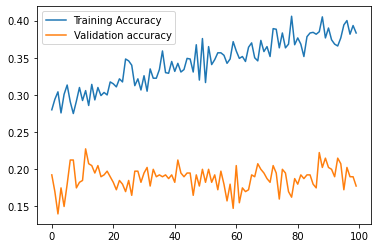

In [12]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.show()

In [27]:
print(test_set[0][0][0].shape)
name_part = str(datetime.datetime.today())

(64, 64, 3)


In [28]:
model.save_weights('current_model.h5')

In [29]:
data = model.predict(test_set[0][0])

In [30]:
for i in data:
    print(np.argmax(i), np.max(i))

11 0.28514236
6 0.2986235
3 0.13563722
17 0.31963524
17 0.1510292
9 0.8688863
24 0.5873631
34 0.36771753
11 0.10400047
34 0.35449022
25 0.5077691
9 0.28610352


In [33]:
os.listdir('training')[11]

'fixing_a_bike_'

In [34]:
data.shape

(12, 40)

In [99]:
os.listdir()

['.ipynb_checkpoints',
 'image_classifier.ipynb',
 'JPEGImages',
 'labels',
 'test',
 'training']

In [120]:
def build_the_file_system():
    for dir_name in os.listdir('JPEGImages'):
        path = "JPEGImages/"+dir_name
        try:
            os.mkdir('test/'+dir_name)
        except:
            pass
        try:
            os.mkdir('training/'+dir_name)
        except:
            pass
        index = 0
        for file in os.listdir(path):
            if index < 10:
                shutil.copy(path+"/"+file, 'test/'+dir_name+"/"+file)
            else:
                shutil.copy(path+"/"+file, 'training/'+dir_name+"/"+file)
            index+=1
#build_the_file_system()    

In [22]:
#
import os
relative_path = 'Stanford40_JPEGImages/JPEGImages/'
import shutil
import numpy as np
import cv2
w_size = 200
h_size = 200
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from PIL import Image
import time
import model
try:
    os.mkdir('realtime')
except:
    pass
def cleandir():
    if len(os.listdir('realtime'))!=0:
        for i in os.listdir('realtime'):
            os.remove('realtime/'+i)
    print('realtime dir cleaned')
def get_prediction(model, image, classes):
    w, l, d = (200, 200, 3)
    prediction = current_model.predict(image.reshape(1, w, l, d))
    #print(np.max(prediction), np.argmax(prediction), classes[np.argmax(prediction)])
    ret_val = np.max(prediction)
    if ret_val < 0.5:
        return classes[6]
    else:
        
        return classes[np.argmax(prediction)]
    
def initial_frames(model):
    """
    Never expect data to have o length
    
    """
    classes = ['applauding', 'phoning', 'jumping', 'reading', 'drinking', 'running', 'NotSure']
    #cleandir()
    cap = cv2.VideoCapture(0)
    cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
    #cv2.resizeWindow('frame', w_size, h_size)
    data = []
    #data = list(data)
    #data = data[1:]
    index = 0
    predicted_classes = []
    # sliding window with latest = 30 images -->  to respond or capture the results --> 
    text_to_display = "Current_Text"
    while True:
        ret, frame = cap.read()
        font = cv2.FONT_HERSHEY_SIMPLEX 
  
        # Use putText() method for 
        # inserting text on video 
        
        #data = data[1:]
        
        if index != 0 and index %3 == 0:
            #cv2.imwrite('realtime/frame_'+str(index)+".jpg", frame)
            #file_ext = index-31
    
            #print(file_ext)
        #if len(os.listdir('realtime')) == 12:
        #        os.remove('realtime/'+os.listdir('realtime')[0])
            #time.sleep(1)
            np_frame = cv2.resize(frame, (w_size, h_size), interpolation = cv2.INTER_AREA)
            np_frame = np.asarray(np_frame)/255.# rescaling it
            data.append(np_frame)
        if len(data) == 16:
            
            if len(predicted_classes)==16:
                predicted_classes = predicted_classes[1:]
                predicted_classes.append(get_prediction(model, data[-1], classes))
            else:
                for image in data:
                    predicted_classes.append(get_prediction(model, image, classes))
            #print(data[0].shape)
            data  = data[1:]
        #print(np_frame.shape)
        # print(frame.)
        #data.append(np_frame)
        count_dic = Counter(predicted_classes)
        #print(len(count_dic), count_dic)
        cv2.putText(frame, 
                    text_to_display,  
                    (50, 50),  
                    font, 1,  
                    (0, 255, 255),  
                    2,  
                    cv2.LINE_AA) 
        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', frame)
        text_to_display = str(count_dic)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):

            break
        index+=1
        
        
        
        
    cap.release()
    cv2.destroyAllWindows()
    data = np.array(data)
    return data
current_model = model.get_model()
current_model.load_weights("current_model_6_class_and_single_test_batch_rot_1005_r.h5")
data = initial_frames(current_model)

In [3]:
str({'jumping': 15, 'running': 1})

"{'jumping': 15, 'running': 1}"

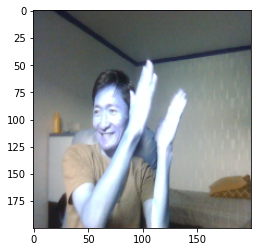

In [7]:
#def model

#import



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten




def data_generator():
    train_datagen = ImageDataGenerator(rescale = 1./255., 
                                   rotation_range = 45,
                                   fill_mode = 'nearest',
                                  shear_range = 0.2, 
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
    test_datagen = ImageDataGenerator(rescale = 1./255.)
    training_set = train_datagen.flow_from_directory('training',
                                                    target_size = (200, 200),
                                                    batch_size =80,
                                                    class_mode = 'categorical')
    test_set = test_datagen.flow_from_directory('test', 
                                               target_size = (200, 200), 
                                           batch_size = 1, 
                                           class_mode = 'categorical')
    step_epochs= len(training_set)
    return train_datagen, training_set, test_datagen, test_set, step_epochs




def get_model():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(32, (3, 3), activation ='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
    #model.add(Conv2D(64, 2, 2, activation =))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(2, 2))

    #model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
    #model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

    #model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(6, activation= 'softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
    

In [13]:
classes = ['applauding', 'phoning', 'jumping', 'reading', 'drinking', 'running']
current_model = model.get_model()
current_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 50, 50, 128)      

In [14]:
current_model.load_weights("current_model_6_class_and_single_test_batch_rot_1005_.h5")

In [15]:
w, l, d = (200, 200, 3)

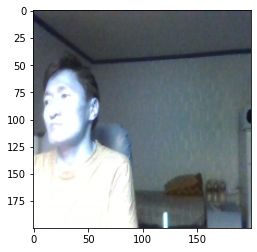

0.47650963 2 jumping


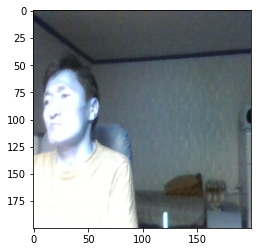

0.46730047 2 jumping


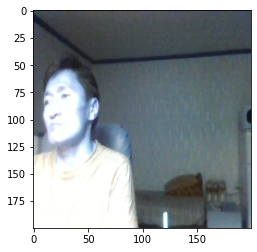

0.47178218 2 jumping


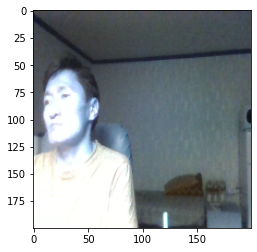

0.47094178 2 jumping


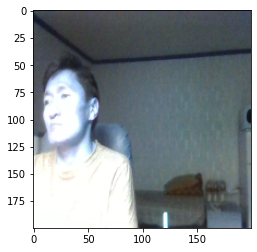

0.46703058 2 jumping


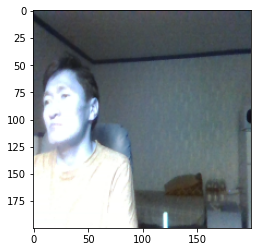

0.46851388 2 jumping


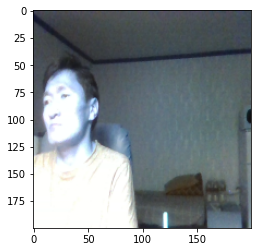

0.4700375 2 jumping


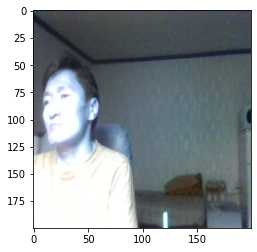

0.47048762 2 jumping


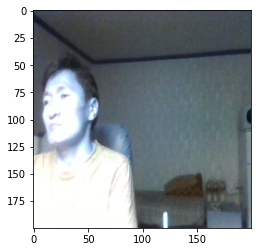

0.4718947 2 jumping


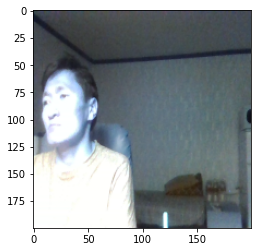

0.47142547 2 jumping


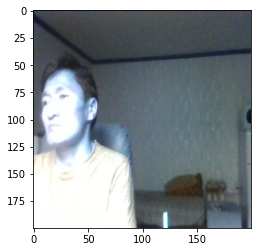

0.47375605 2 jumping


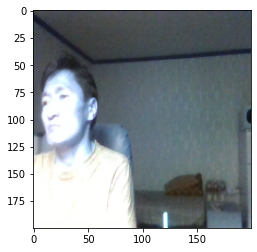

0.47365987 2 jumping


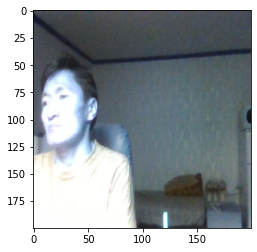

0.47382098 2 jumping


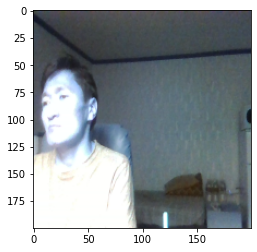

0.46420318 2 jumping


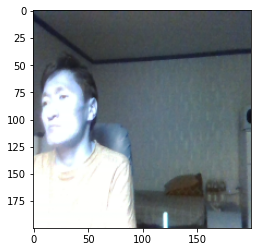

0.4813467 2 jumping


In [18]:


for image in data:
    plt.imshow(image)
    plt.show()
    prediction = current_model.predict(image.reshape(1, w, l, d))
    print(np.max(prediction), np.argmax(prediction), classes[np.argmax(prediction)])

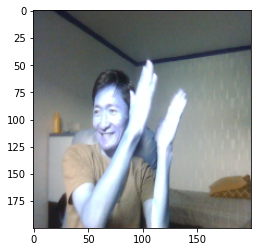

In [24]:
plt.imshow(data[3])